#**<u> PROJET THEORIE DES GRAPHES:</u>** RESEAUX SOCIAUX & GRAPHES

### <u>Membres du groupe</u>:
  1.  **OUEDRAOGO** Farida
  2. **BADOLO** Christian Thomas


# **Bibliothèques**

In [ ]:
# Importe la bibliothèque NetworkX pour les graphes et réseaux
import networkx as nx

# Importe la bibliothèque Matplotlib pour les visualisations
import matplotlib.pyplot as plt

# Importe la bibliothèque NumPy pour les calculs numériques
import numpy as np

# Importe la bibliothèque Pandas pour la manipulation de données
import pandas as pd

# Importe la classe deque pour une file à double extrémité
from collections import deque

# Importe la classe PriorityQueue pour une file de priorité
from queue import PriorityQueue


# **Fonction pour charger les données et pour construire un réseau**

In [ ]:
def edges(file_name):
    edges = []           # Initialise une liste vide pour stocker les arêtes
    with open(file_name, 'r') as file:               # Ouvre le fichier en mode lecture
        lines = file.readlines()                 # Lit toutes les lignes du fichier
        num_nodes, num_edges = map(int, lines[0].split())              # Extrait le nombre de nœuds et d'arêtes à partir de la première ligne
        for line in lines[1:]:                    # Parcourt les lignes restantes du fichier
            edge = tuple(line.split())                 # Divise la ligne en une paire d'éléments et stocke l'arête comme un tuple
            edges.append(edge)                  # Ajoute l'arête à la liste des arêtes
    return edges                    # Retourne la liste complète des arêtes extraites du fichier


In [ ]:
def reseau(network_name, edges):
  #Création du graphe
  G = nx.Graph()

  #Ajout des arcs à coûts unitaires
  G.add_edges_from(edges, weight=1 )

  #Affichage du graphe
  pos = nx.spring_layout(G, seed=500)
  nx.draw(G, pos, with_labels=True, node_size=500)
  plt.title(f"{network_name}", fontsize=20)
  plt.rcParams['figure.figsize'] = 15, 8
  plt.show()

  return G


# **A) RESEAU_0**

## **1) PageRank**

In [ ]:
#Fonction calculant la le pagerank
def PageRank(graphe, α, β):
    #Calcul des degrés de chaque nœud
    A = nx.adjacency_matrix(graphe, nodelist=sorted(graphe.nodes())).todense() #Matrice d'ajdacence
    degrees = np.sum(A, axis=1) #l'ensembre de dégrés de chaque noeud

    #Création de la matrice diagonale des degrés
    D = np.diag(degrees)

    #Calcul de (I - α * A_transposé * D^-1)
    inner_matrix = np.identity(len(A)) - α * np.matmul(A.transpose(), np.linalg.inv(D))

    #Calcul de la centralité
    centrality = β * np.linalg.inv(inner_matrix) @ np.ones(len(A))

    centrality_dict = {node: centrality[index] for index, node in enumerate(sorted(graphe.nodes()))}

    return {k: v for k, v in sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)} #retourne les centralités par ordre

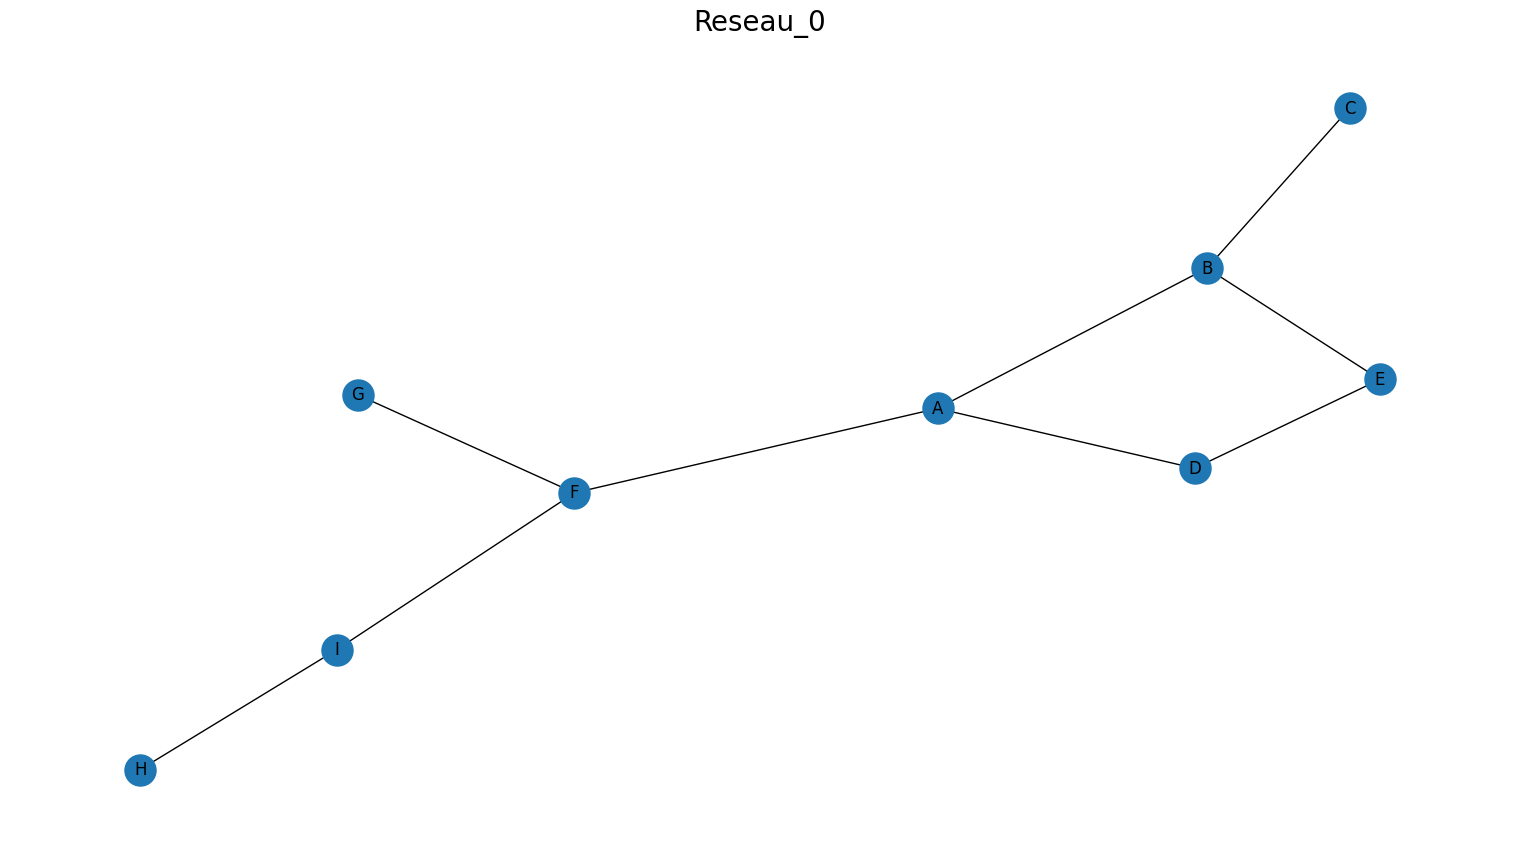

In [ ]:
#Création du réseau 0
edges_reseau_0 = [("A", "B"), ("A", "D"), ("A", "F"), ("B", "C"), ("B", "E"), ("D", "E"), ("F", "G"), ("F", "I"), ("I", "H")]
reseau_0 = reseau("Reseau_0", edges_reseau_0)

In [ ]:
print(f"Centralités PageRank pour α = {1} et β = {0} : \n{ PageRank(reseau_0, 1, 0)} \n")
print(f"Centralités PageRank pour α = {0.85} et β = {1} : \n{ PageRank(reseau_0, 0.85, 1)} \n")
print(f"Centralités PageRank pour α = {0} et β = {1} : \n{PageRank(reseau_0, 0, 1)} \n")


Centralités PageRank pour α = 1 et β = 0 : 
{'A': 0.0, 'B': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0} 

Centralités PageRank pour α = 0.85 et β = 1 : 
{'F': 9.942355567006283, 'B': 9.397704812491918, 'A': 9.15056407483829, 'I': 7.306459090387651, 'E': 6.333563330853176, 'D': 6.284424236816782, 'H': 4.105245113414751, 'G': 3.817000743985113, 'C': 3.6626830302060434} 

Centralités PageRank pour α = 0 et β = 1 : 
{'A': 1.0, 'B': 1.0, 'C': 1.0, 'D': 1.0, 'E': 1.0, 'F': 1.0, 'G': 1.0, 'H': 1.0, 'I': 1.0} 



In [ ]:
print(f"Centralités PageRank pour α = {0.99} et β = {1} : \n{PageRank(reseau_0, 0.97, 1)} \n")

Centralités PageRank pour α = 0.99 et β = 1 : 
{'F': 50.2613003059971, 'B': 49.07986518435188, 'A': 48.987950156723834, 'I': 34.408750383544, 'E': 32.736796391118105, 'D': 32.71678346703299, 'H': 17.688243936018843, 'G': 17.251153765605725, 'C': 16.869156409607108} 



**b) Discussion des effets de $\alpha$ et de $\beta$ pour réseau_0**

L'importance propre d'un noeud est relié à la valeur de $\beta$ et l'importance liée à ses voisins est reliée à la valeur de $\alpha$.

**Cas 1**

 Lorsque $\beta$ $= 0 $  ,la mesure de centralité ne parvient pas à attribuer des valeurs significatives aux nœuds et donc elles deviennent toutes nulles et ce quelque soit la valeur de $\alpha$.


 **Cas 2**

 Lorsque $\alpha$ $ \lt 1$ et élevé $(0,85)$ ,  les nœuds très connectés ou avec de nombreux liens sortants voient leur centralité augmenter. Ces nœuds deviennent des points focaux importants dans le réseau.
Les nœuds moins connectés ou isolés voient leur centralité diminuer, car le surfeur aléatoire a tendance à rester concentré autour des nœuds fortement connectés.


**Cas 3**

 Lorsque $\alpha$ $ =0 $ et $\beta$ $= 1 $  , la centralité obtenue est liée uniquement à $\beta$ qui est le terme de biais et ainsi la centralité de chaque noeud reste celle qui lui est propre donc une valeur de $1$ pour chaque noeud.



**c) Interprétation**:

Dans le cadre du PageRank il faut choisir des valeurs de alpha inférieure à $1/$$\lambda$, $\lambda$ étant la plus grande valeur propre de la matrice d'adjacence du réseau, pour s'assurer de la convergence des centralités.Cependant lorsque $\alpha$ est encore plus proche de 1 la convergence s'avère rapide.

**COMMENTAIRE**

Voici une fonction permettant de trouver la valeur optimale de $\alpha$ qui va permettre de calculer le pageRank pour tous les reseaux

In [ ]:


def alpha_optimal(graph):
    # Récupération de la matrice d'adjacence du réseau
    adjacency_matrix = nx.adjacency_matrix(graph)

    # Conversion de la matrice d'adjacence en format numpy array
    adjacency_matrix = adjacency_matrix.todense()

    # Calcul des valeurs propres de la matrice d'adjacence
    eigenvalues = np.linalg.eigvals(adjacency_matrix)

    # Trouver la valeur propre maximale
    max_eigenvalue = max(eigenvalues)

    # Calcul de l'inverse de la valeur propre maximale
    inverse_max_eigenvalue = 1 / max_eigenvalue
    alpha_optimal= inverse_max_eigenvalue- 0.0001

    return alpha_optimal


In [ ]:
alpha_optimal(reseau_0)

0.42827299059613155

## **2) Centralité d'intermédiarité**

In [ ]:
def nombre_plus_courts_chemins(G, s, t):
    try:
        # Calcul des plus courts chemins de s à t
        all_shortest_paths = list(nx.all_shortest_paths(G, source=s, target=t))
        return len(all_shortest_paths)
    except nx.NetworkXNoPath:  # Si aucun chemin n'est trouvé
        return 0  # Il n'existe pas de chemin entre s et t


In [ ]:
def nombre_plus_courts_chemins_passant_par_v(G, s, t, v):
    try:
        # Calcul des plus courts chemins de s à t
        all_shortest_paths = list(nx.all_shortest_paths(G, source=s, target=t))

        # Filtrer les chemins passant par le nœud intermédiaire v
        paths_passant_par_v = [path for path in all_shortest_paths if v in path]

        return len(paths_passant_par_v)
    except nx.NetworkXNoPath:  # Si aucun chemin n'est trouvé
        return 0  # Il n'existe pas de chemin entre s et t


In [ ]:
def betweenness_centrality(G):
    # Initialisation du dictionnaire de centralité intermédiaire pour chaque nœud
    betweenness = {node: 0.0 for node in G.nodes()}

    # Itération sur chaque nœud du graphe
    for v in G.nodes():
        for s in G.nodes():
            for t in G.nodes():
                if s != t and v != s and v != t:
                    # Calcul du nombre de plus courts chemins entre s et t
                    sigma_st = nombre_plus_courts_chemins(G, s, t)

                    # Calcul du nombre de chemins passant par v
                    sigma_st_v = nombre_plus_courts_chemins_passant_par_v(G, s, t, v)

                    # Mise à jour de la centralité intermédiaire pour le nœud v
                    if sigma_st != 0:
                        betweenness[v] += sigma_st_v / sigma_st

    #Normalisation
    n = len(G.nodes())
    for node in betweenness:
      betweenness[node] /= (n - 2) * (n - 1)

    sorted_centrality = {k: v for k, v in sorted(betweenness.items(), key=lambda item: item[1], reverse=True)}

    return sorted_centrality

In [ ]:
# Calcul de la centralité intermédiaire
print("Centralité intermédiaire reseau_0: \n",betweenness_centrality(reseau_0))

Centralité intermédiaire reseau_0: 
 {'A': 0.6071428571428571, 'F': 0.6071428571428571, 'B': 0.3392857142857143, 'I': 0.25, 'D': 0.08928571428571429, 'E': 0.03571428571428571, 'C': 0.0, 'G': 0.0, 'H': 0.0}


## **3) Centralité de proximité**

In [ ]:
def shortest_paths(graph, start_node):
    # Initialisation des distances
    distances = {node: float('inf') for node in graph.nodes()}  # Initialise les distances à l'infini pour tous les nœuds du graphe
    distances[start_node] = 0  # La distance du nœud de départ à lui-même est mise à 0
    queue = [(0, start_node)]  # Crée une file de priorité avec le nœud de départ et sa distance (0)

    # Parcours en largeur (BFS)
    while queue:  # Tant que la file de priorité n'est pas vide
        current_distance, current_node = queue.pop(0)  # Prend le premier élément de la file (plus petite distance actuelle)
        for neighbor in graph.neighbors(current_node):  # Pour chaque voisin du nœud actuel dans le graphe
            new_distance = current_distance + 1  # Calcule la nouvelle distance, avec un poids de 1 pour chaque arête
            if new_distance < distances[neighbor]:  # Vérifie si cette nouvelle distance est plus courte que la connue précédemment
                distances[neighbor] = new_distance  # Met à jour la distance vers le voisin
                queue.append((new_distance, neighbor))  # Ajoute le voisin à la file avec sa nouvelle distance

    return distances  # Retourne un dictionnaire contenant les distances les plus courtes depuis le nœud de départ vers tous les autres nœuds du graphe


In [ ]:
def closeness_centrality(graph):
    closeness_centralities = {}
    for node in graph.nodes():
        distances = shortest_paths(graph, node)
        reachable = sum(1 for dist in distances.values() if dist != float('inf'))
        total_distance = sum(dist for dist in distances.values() if dist != float('inf'))

        if total_distance > 0:
            # Normalisation par le nombre de nœuds atteignables
            closeness_centralities[node] = (reachable - 1) / total_distance
            closeness_centralities[node] *= (reachable - 1) / (len(graph.nodes()) - 1)
        else:
            closeness_centralities[node] = 0

    return {k: v for k, v in sorted(closeness_centralities.items(), key=lambda item: item[1], reverse=True)}

In [ ]:
#Calcul de la centralité de proximité
print("Centralité de proximité :", closeness_centrality(reseau_0))

Centralité de proximité : {'A': 0.5714285714285714, 'F': 0.5333333333333333, 'B': 0.47058823529411764, 'D': 0.42105263157894735, 'I': 0.4, 'E': 0.36363636363636365, 'G': 0.36363636363636365, 'C': 0.3333333333333333, 'H': 0.2962962962962963}


# **B) AUTRES_RESEAUX**
# **1) Soc_karate**

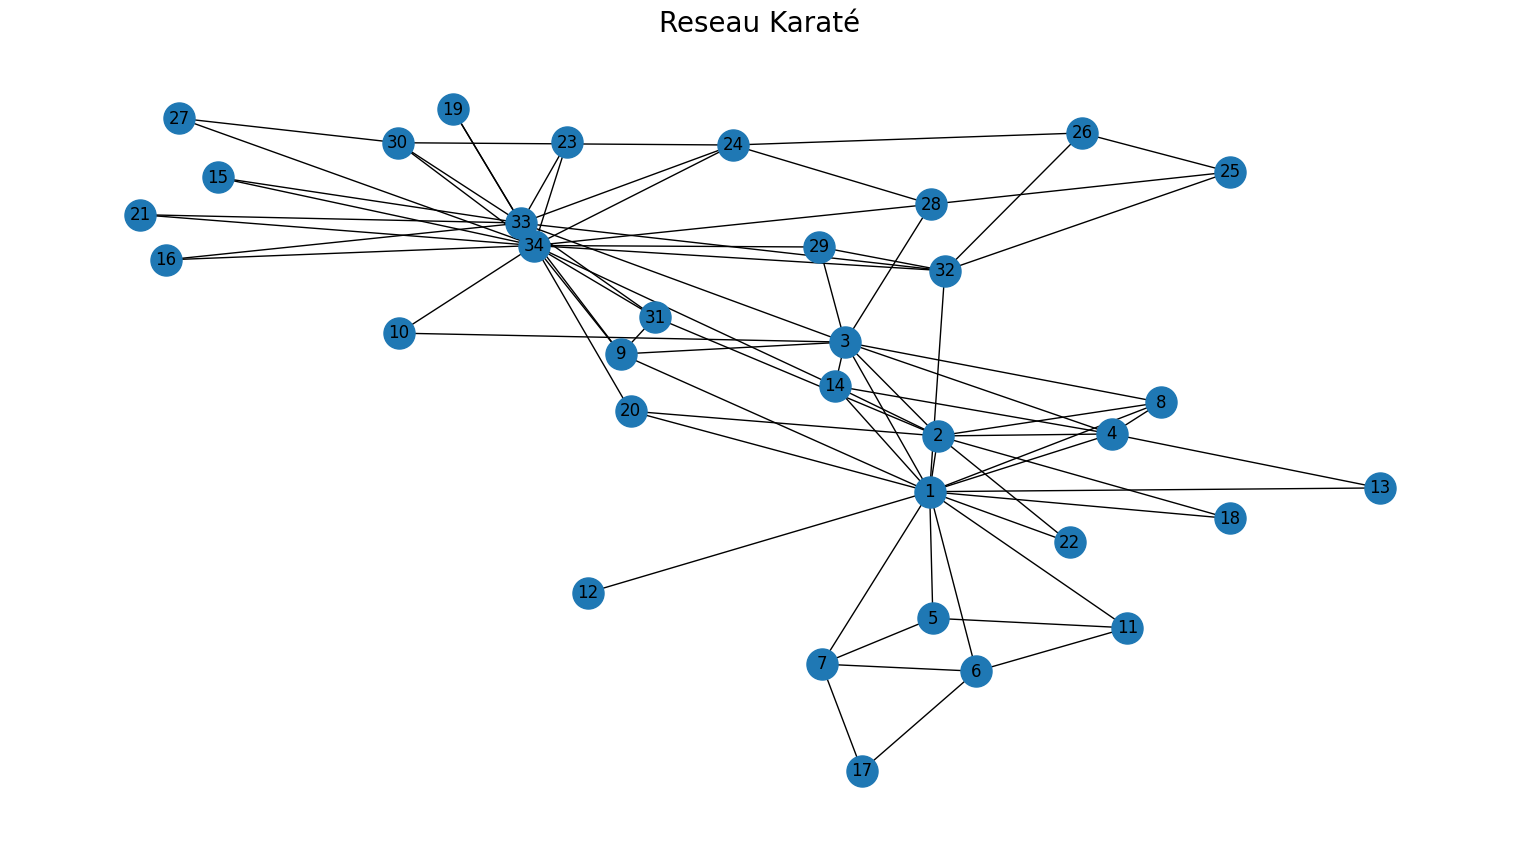

Centralité PageRank :  {'34': (1.9222836964362278+0j), '1': (1.8453827618542242+0j), '33': (1.6037868017911985+0j), '2': (1.3883451988037854+0j), '3': (1.3682602651657103+0j), '32': (1.218023375456511+0j), '4': (1.2115872636274918+0j), '7': (1.197855710268642+0j), '6': (1.1978557102686416+0j), '24': (1.1768080567471497+0j), '30': (1.1503444501895972+0j), '28': (1.1279487238211057+0j), '25': (1.1275813720333299+0j), '26': (1.120980509945964+0j), '11': (1.1169527025812465+0j), '5': (1.1169527025812465+0j), '9': (1.1147158222780467+0j), '14': (1.1071925272723386+0j), '31': (1.092705403043401+0j), '8': (1.0903913766765105+0j), '17': (1.088990772199577+0j), '29': (1.0672942558237175+0j), '27': (1.0595316898587384+0j), '20': (1.0568588053370886+0j), '13': (1.0471407222626001+0j), '18': (1.0400576547412603+0j), '22': (1.0400576547412603+0j), '10': (1.0371312348494293+0j), '15': (1.0366591664251976+0j), '19': (1.0366591664251976+0j), '16': (1.0366591664251974+0j), '21': (1.0366591664251974+0j)

In [ ]:
soc_karate = edges("/content/soc-karate.txt") #Chargement des données
reseau_karate = reseau("Reseau Karaté",soc_karate) #Création du réseau

#Différentes centralités
print("Centralité PageRank : ", PageRank(reseau_karate, alpha_optimal(reseau_karate), 1))
print("Centralité d'intermédiarité : ", betweenness_centrality(reseau_karate))
print("Centralité de proximité : ", closeness_centrality(reseau_karate))

#**2) Soc_tribes**

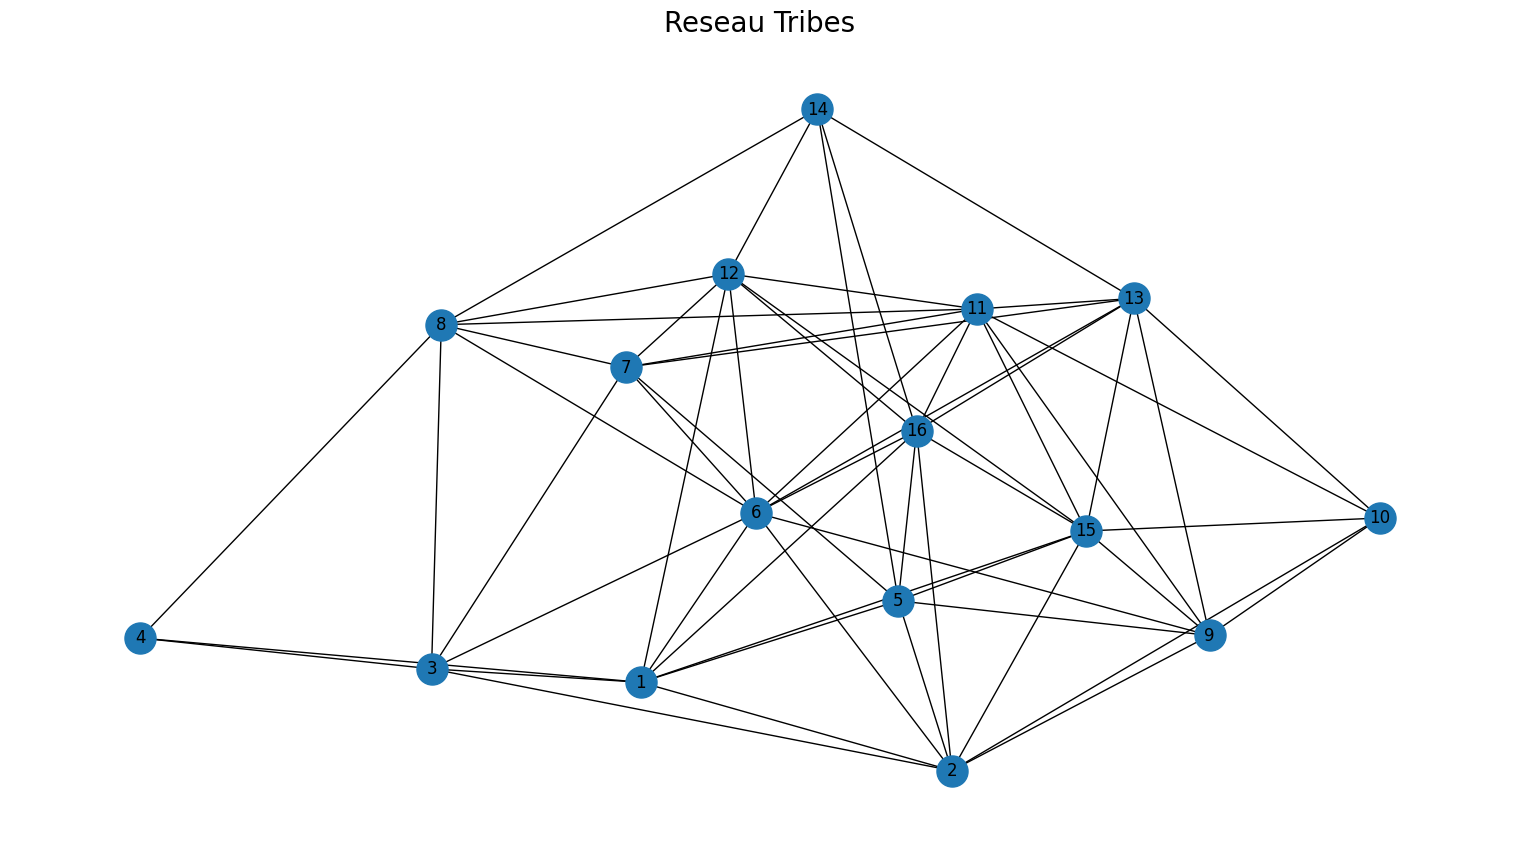

Centralité PageRank :  {'6': 1.1981898734288121, '15': 1.1802159301207742, '11': 1.1794021517546995, '1': 1.179104801508906, '16': 1.174886660036492, '8': 1.1716692307926, '13': 1.1655013007250188, '2': 1.1639355901165485, '12': 1.1569100101883425, '5': 1.14259354652972, '3': 1.142436901129907, '7': 1.1378144510415067, '9': 1.1368802254364003, '14': 1.0974986446006911, '10': 1.0928689573732207, '4': 1.0655448986205829}
Centralité d'intermédiarité :  {'1': 0.07501133786848072, '6': 0.07198412698412698, '8': 0.06296296296296296, '11': 0.057101284958427805, '2': 0.05247165532879819, '15': 0.04637566137566137, '13': 0.04294784580498865, '16': 0.03892668178382465, '5': 0.03484126984126985, '12': 0.03263038548752835, '7': 0.03243386243386244, '3': 0.032275132275132276, '9': 0.01691609977324263, '14': 0.015978835978835978, '10': 0.0038095238095238095, '4': 0.002380952380952381}
Centralité de proximité :  {'6': 0.75, '11': 0.7142857142857143, '15': 0.7142857142857143, '16': 0.7142857142857143,

In [ ]:
soc_tribes = edges("/content/soc-tribes.txt")
reseau_tribes  = reseau("Reseau Tribes",soc_tribes )

#Différentes centralités
print("Centralité PageRank : ", PageRank(reseau_tribes, alpha_optimal(reseau_tribes), 1))
print("Centralité d'intermédiarité : ", betweenness_centrality(reseau_tribes))
print("Centralité de proximité : ", closeness_centrality(reseau_tribes))

# **Soc_physicians**

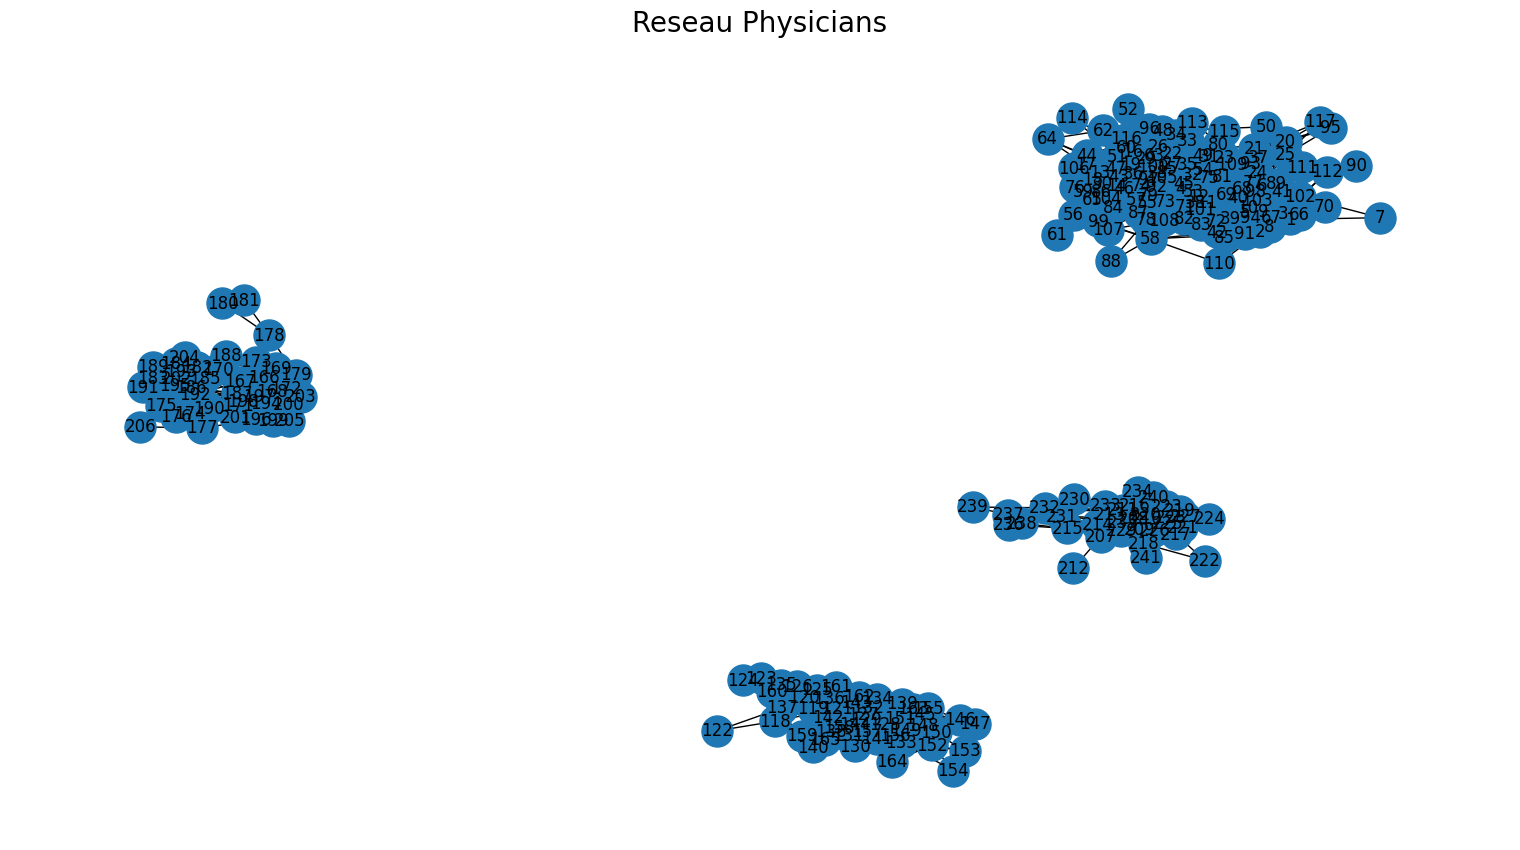

Centralité PageRank :  {'15': 1.406028729030972, '127': 1.405771726857959, '121': 1.3464045802318652, '128': 1.3010791169556315, '23': 1.2565623746102508, '194': 1.2503918375529952, '74': 1.2425353579501925, '197': 1.2297885108158928, '10': 1.2284348467918715, '11': 1.211877410520609, '40': 1.2107404265426178, '29': 1.2068535575619836, '12': 1.2051166144646919, '25': 1.2036243299840603, '213': 1.2032937368448686, '192': 1.2020572569242534, '63': 1.1983778614722356, '89': 1.1977248865573784, '69': 1.1950950395975282, '13': 1.1949981034603172, '9': 1.1941766989895048, '54': 1.1935015274479477, '58': 1.1934711270890968, '78': 1.1927208531822262, '48': 1.1912312806231333, '5': 1.1880745777414243, '16': 1.1875026447683497, '87': 1.1844008458945385, '170': 1.1824105109969894, '4': 1.1799567419639372, '232': 1.177871722433679, '231': 1.1756192363724598, '220': 1.174863612878958, '209': 1.172464422552034, '210': 1.1722170529604496, '36': 1.1654934469926426, '60': 1.1651393376307995, '198': 1.1

In [ ]:
soc_physicians = edges("/content/soc-physicians.txt")
reseau_physicians  = reseau("Reseau Physicians",soc_physicians)

#Différentes centralités
print("Centralité PageRank : ", PageRank(reseau_physicians, alpha_optimal(reseau_physicians), 1))
print("Centralité d'intermédiarité : ", nx.betweenness_centrality(reseau_physicians))
print("Centralité de proximité : ", closeness_centrality(reseau_physicians))

# **C) SYNTHESE DES CALCULS POUR CHAQUE RESEAU**

In [ ]:
def synthese(reseau):
    # Nombre de nœuds
    nombre_noeuds = len(reseau.nodes())

    # Nombre d'arêtes
    nombre_aretes = len(reseau.edges())

    # Fonction pour trouver tous les noeuds avec une valeur spécifique
    def noeuds_avec_valeur(valeur_dict, valeur):
        return [noeud for noeud, val in valeur_dict.items() if val == valeur]

    def afficher_dataframe(df):
      with pd.option_context('display.max_colwidth', -1):  # Assure que la largeur des colonnes est suffisante
        print(df.to_string(index=False))


    # Degré
    degree_values = dict(reseau.degree())
    degree_min = min(degree_values.values())
    degree_max = max(degree_values.values())
    degree_mean = sum(degree_values.values()) / len(degree_values)

    # Centralité (PageRank)
    pagerank_values = PageRank(reseau, alpha_optimal(reseau), 1)
    pagerank_min = min(pagerank_values.values())
    pagerank_max = max(pagerank_values.values())
    pagerank_mean = sum(pagerank_values.values()) / len(pagerank_values)

    # Centralité d'intermédiarité
    betweenness_values = nx.betweenness_centrality(reseau)
    betweenness_min = min(betweenness_values.values())
    betweenness_max = max(betweenness_values.values())
    betweenness_mean = sum(betweenness_values.values()) / len(betweenness_values)

    # Centralité de proximité
    closeness_values = closeness_centrality(reseau)
    closeness_min = min(closeness_values.values())
    closeness_max = max(closeness_values.values())
    closeness_mean = sum(closeness_values.values()) / len(closeness_values)

    # Création du DataFrame
    data = [
        ('Nombre de nœuds', nombre_noeuds, ''),
        ('Nombre d\'arêtes', nombre_aretes, ''),
        ('Degré - min', degree_min, ', '.join(noeuds_avec_valeur(degree_values, degree_min))),
        ('Degré - max', degree_max, ', '.join(noeuds_avec_valeur(degree_values, degree_max))),
        ('Degré - moyen', degree_mean, ''),
        ('Centralité (PageRank) - min', pagerank_min, ', '.join(noeuds_avec_valeur(pagerank_values, pagerank_min))),
        ('Centralité (PageRank) - max', pagerank_max, ', '.join(noeuds_avec_valeur(pagerank_values, pagerank_max))),
        ('Centralité (PageRank) - moyenne', pagerank_mean, ''),
        ('Centralité d\'intermédiarité - min', betweenness_min, ', '.join(noeuds_avec_valeur(betweenness_values, betweenness_min))),
        ('Centralité d\'intermédiarité - max', betweenness_max, ', '.join(noeuds_avec_valeur(betweenness_values, betweenness_max))),
        ('Centralité d\'intermédiarité - moyenne', betweenness_mean, ''),
        ('Centralité de proximité - min', closeness_min, ', '.join(noeuds_avec_valeur(closeness_values, closeness_min))),
        ('Centralité de proximité - max', closeness_max, ', '.join(noeuds_avec_valeur(closeness_values, closeness_max))),
        ('Centralité de proximité - moyenne', closeness_mean, ''),
    ]

    # Création du DataFrame Pandas
    df = pd.DataFrame(data, columns=['Caractéristique', 'Valeur', 'Noeud(s)_Concerné(s)'])

    # Affichage du DataFrame

    # Utilisez cette fonction pour afficher le DataFrame
    afficher_dataframe(df)


In [ ]:
synthese(reseau_0)

                      Caractéristique   Valeur Noeud(s)_Concerné(s)
                      Nombre de nœuds 9.000000                     
                      Nombre d'arêtes 9.000000                     
                          Degré - min 1.000000              C, G, H
                          Degré - max 3.000000              A, B, F
                        Degré - moyen 2.000000                     
          Centralité (PageRank) - min 1.314594                    C
          Centralité (PageRank) - max 2.263525                    F
      Centralité (PageRank) - moyenne 1.749087                     
    Centralité d'intermédiarité - min 0.000000              C, G, H
    Centralité d'intermédiarité - max 0.607143                 A, F
Centralité d'intermédiarité - moyenne 0.214286                     
        Centralité de proximité - min 0.296296                    H
        Centralité de proximité - max 0.571429                    A
    Centralité de proximité - moyenne 0.417034  

In [ ]:
synthese(reseau_karate)

                      Caractéristique             Valeur                          Noeud(s)_Concerné(s)
                      Nombre de nœuds  34.00000+0.00000j                                              
                      Nombre d'arêtes  78.00000+0.00000j                                              
                          Degré - min 1.0+000000.000000j                                            12
                          Degré - max  17.00000+0.00000j                                            34
                        Degré - moyen 4.588235+0.000000j                                              
          Centralité (PageRank) - min 1.017137+0.000000j                                            12
          Centralité (PageRank) - max 1.922284+0.000000j                                            34
      Centralité (PageRank) - moyenne 1.174513+0.000000j                                              
    Centralité d'intermédiarité - min 0.0+000000.000000j 8, 12, 13, 18, 2

In [ ]:
synthese(reseau_tribes)

                      Caractéristique    Valeur Noeud(s)_Concerné(s)
                      Nombre de nœuds 16.000000                     
                      Nombre d'arêtes 58.000000                     
                          Degré - min  3.000000                    4
                          Degré - max 10.000000                    6
                        Degré - moyen  7.250000                     
          Centralité (PageRank) - min  1.065545                    4
          Centralité (PageRank) - max  1.198190                    6
      Centralité (PageRank) - moyenne  1.149091                     
    Centralité d'intermédiarité - min  0.002381                    4
    Centralité d'intermédiarité - max  0.075011                    1
Centralité d'intermédiarité - moyenne  0.038690                     
        Centralité de proximité - min  0.500000                    4
        Centralité de proximité - max  0.750000                    6
    Centralité de proximité - moye

In [ ]:
synthese(reseau_physicians)

                      Caractéristique     Valeur                            Noeud(s)_Concerné(s)
                      Nombre de nœuds 241.000000                                                
                      Nombre d'arêtes 923.000000                                                
                          Degré - min   1.000000                                             212
                          Degré - max  28.000000                                             127
                        Degré - moyen   7.659751                                                
          Centralité (PageRank) - min   1.018888                                             212
          Centralité (PageRank) - max   1.406029                                              15
      Centralité (PageRank) - moyenne   1.109767                                                
    Centralité d'intermédiarité - min   0.000000 95, 115, 117, 122, 154, 180, 181, 212, 222, 239
    Centralité d'intermédiarit

# **ADDITIONNEL**: Visualisation par couleurs des différents noeuds des résaux pour chaque centralité

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def draw_graph_with_centrality(G, centrality, network_name, centrality_type):
    # Normaliser les valeurs de centralité pour la taille et la couleur des nœuds
    max_centrality = max(centrality.values())
    min_centrality = min(centrality.values())
    centrality_range = max_centrality - min_centrality
    min_size = 500  # Taille minimale pour la centralité la plus basse
    normalized_centrality_size = {node: min_size + 500 * (centrality[node] - min_centrality) / centrality_range for node in G.nodes()}
    normalized_centrality_color = [centrality[node] for node in G.nodes()]

    # Trier les nœuds en fonction de leur centralité
    sorted_nodes = sorted(G.nodes(), key=lambda n: centrality[n], reverse=True)

    # Définir la disposition du graphe
    pos = nx.spring_layout(G, seed=42)

    # Choisir une carte de couleurs
    cmap = plt.get_cmap('viridis')

    # Dessiner les nœuds avec une taille et une couleur basées sur leur centralité
    nx.draw_networkx_nodes(G, pos, nodelist=sorted_nodes, node_size=[normalized_centrality_size[n] for n in sorted_nodes],
                           node_color=[centrality[n] for n in sorted_nodes], alpha=0.8, cmap=cmap)

    # Dessiner les arêtes
    nx.draw_networkx_edges(G, pos, edge_color='gray')

    # Dessiner les étiquettes des nœuds
    nx.draw_networkx_labels(G, pos, font_size=10)

    # Ajouter un titre au graphe
    plt.title(f"{network_name} - {centrality_type} Centrality", fontsize=15)

    # Afficher la barre de couleur
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_centrality, vmax=max_centrality))
    sm.set_array([])
    plt.colorbar(sm)

    # Afficher le graphe
    plt.rcParams['figure.figsize'] = [15, 8]
    plt.axis('off')
    plt.show()


# **Reseau_0**

<ipython-input-64-21cc6c809df4>:39: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


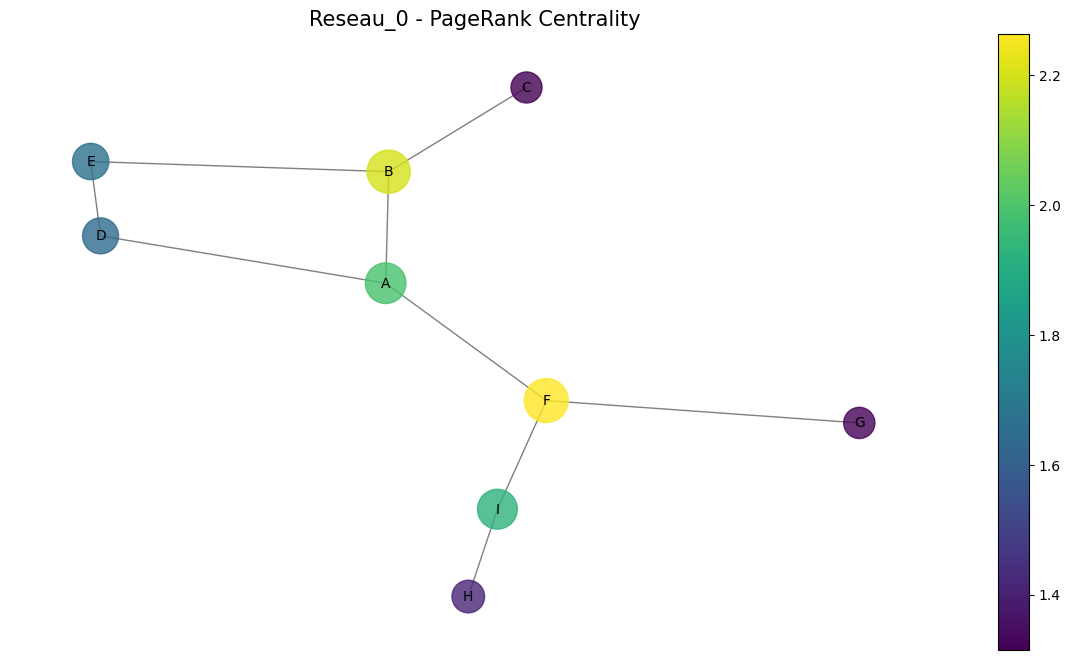

In [ ]:
draw_graph_with_centrality(reseau_0, PageRank(reseau_0, alpha_optimal(reseau_0),1), "Reseau_0", "PageRank")

<ipython-input-64-21cc6c809df4>:39: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


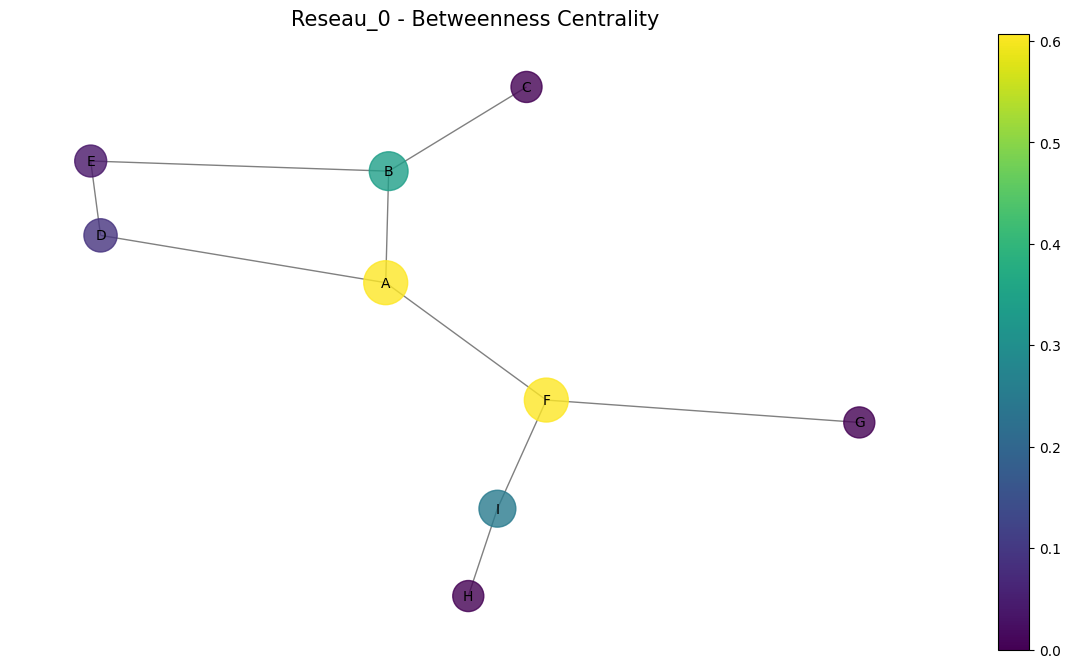

In [ ]:
draw_graph_with_centrality(reseau_0, betweenness_centrality(reseau_0), "Reseau_0", "Betweenness")

<ipython-input-64-21cc6c809df4>:39: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


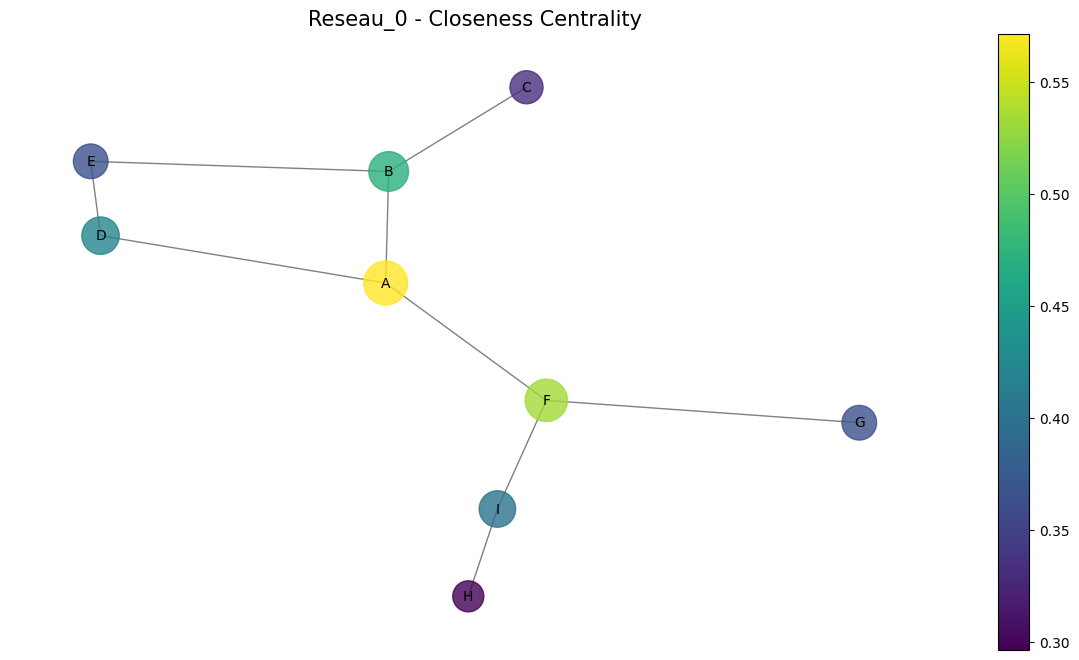

In [ ]:
draw_graph_with_centrality(reseau_0, closeness_centrality(reseau_0), "Reseau_0", "Closeness")

# **Soc_karaté**

<ipython-input-64-21cc6c809df4>:39: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


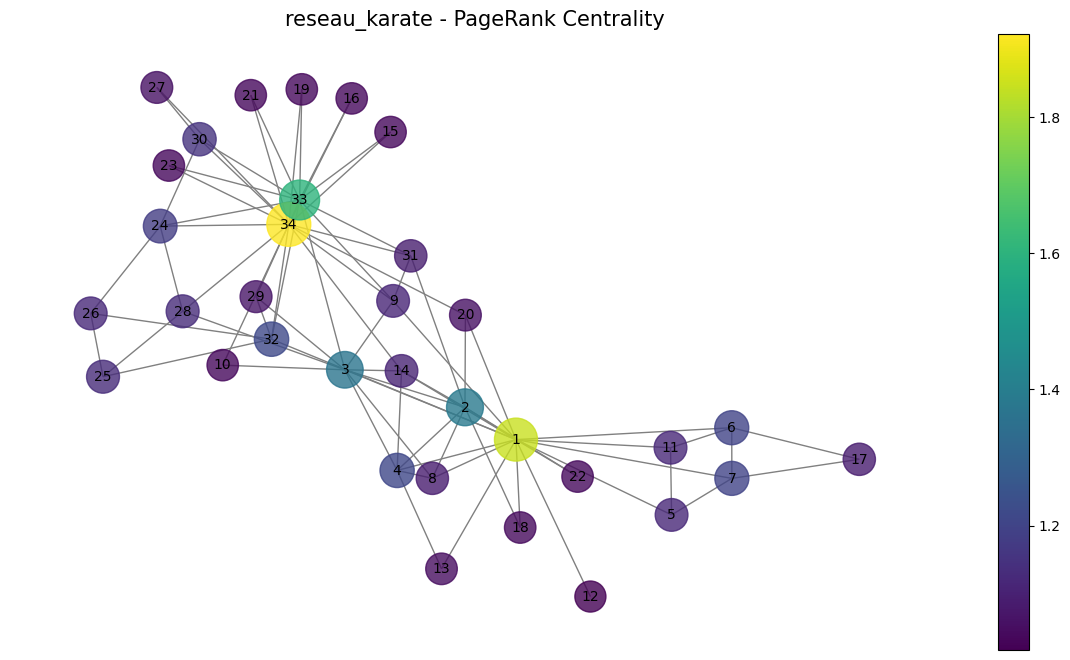

In [ ]:
draw_graph_with_centrality(reseau_karate, PageRank(reseau_karate, alpha_optimal(reseau_karate).real,1), "reseau_karate", "PageRank")

<ipython-input-64-21cc6c809df4>:39: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


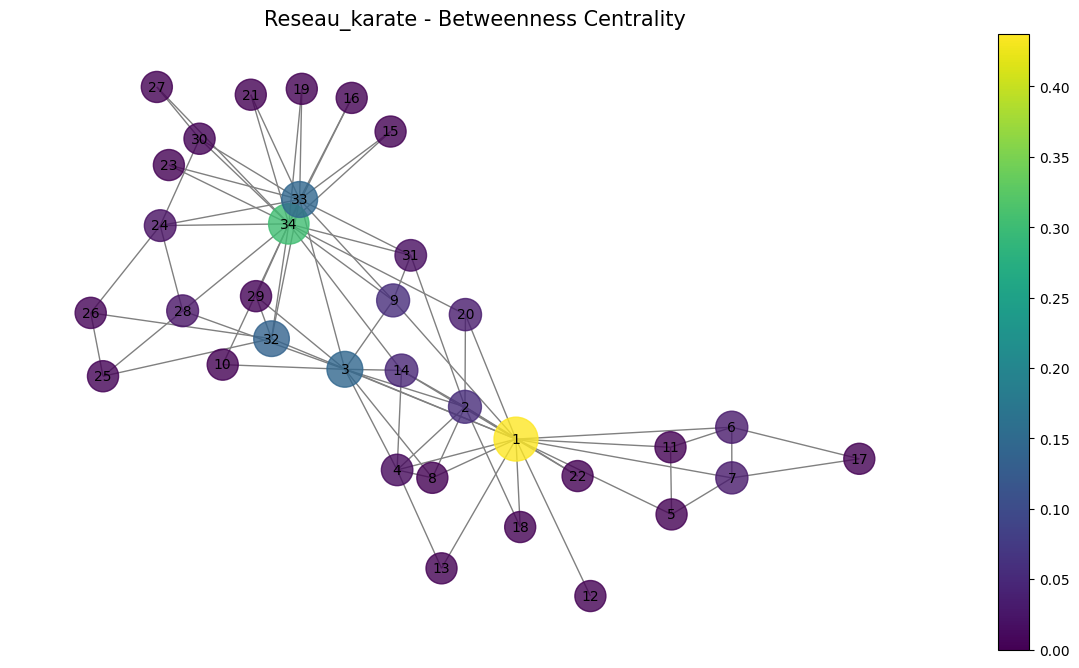

In [ ]:
draw_graph_with_centrality(reseau_karate, betweenness_centrality(reseau_karate), "Reseau_karate", "Betweenness")

<ipython-input-64-21cc6c809df4>:39: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


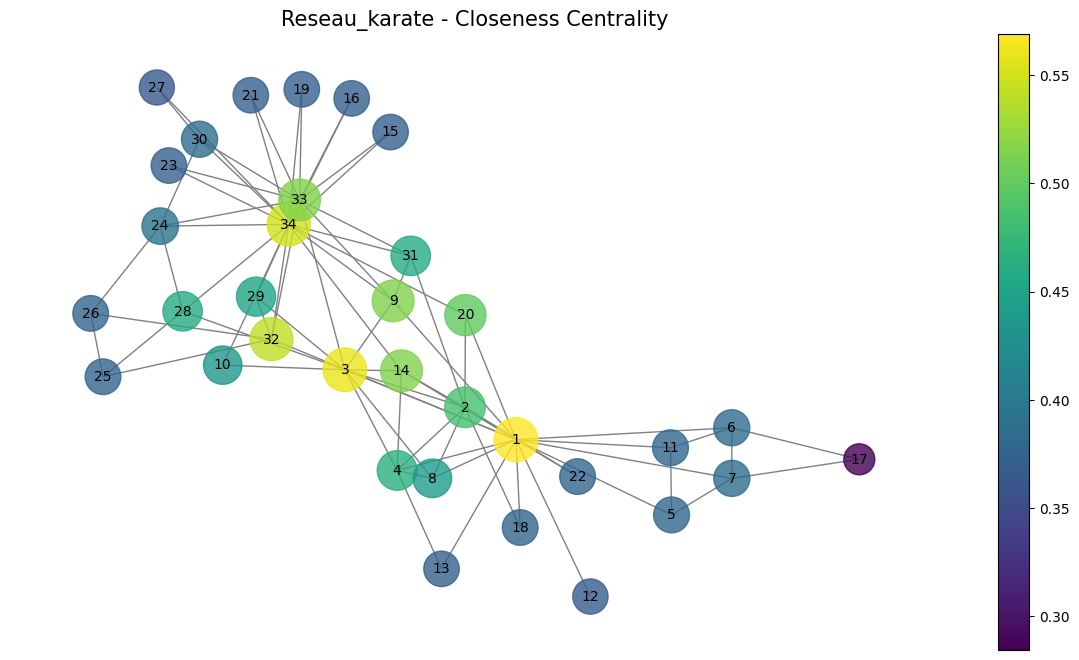

In [ ]:
draw_graph_with_centrality(reseau_karate, closeness_centrality(reseau_karate), "Reseau_karate", "Closeness")

# **Soc tribes**

<ipython-input-64-21cc6c809df4>:39: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


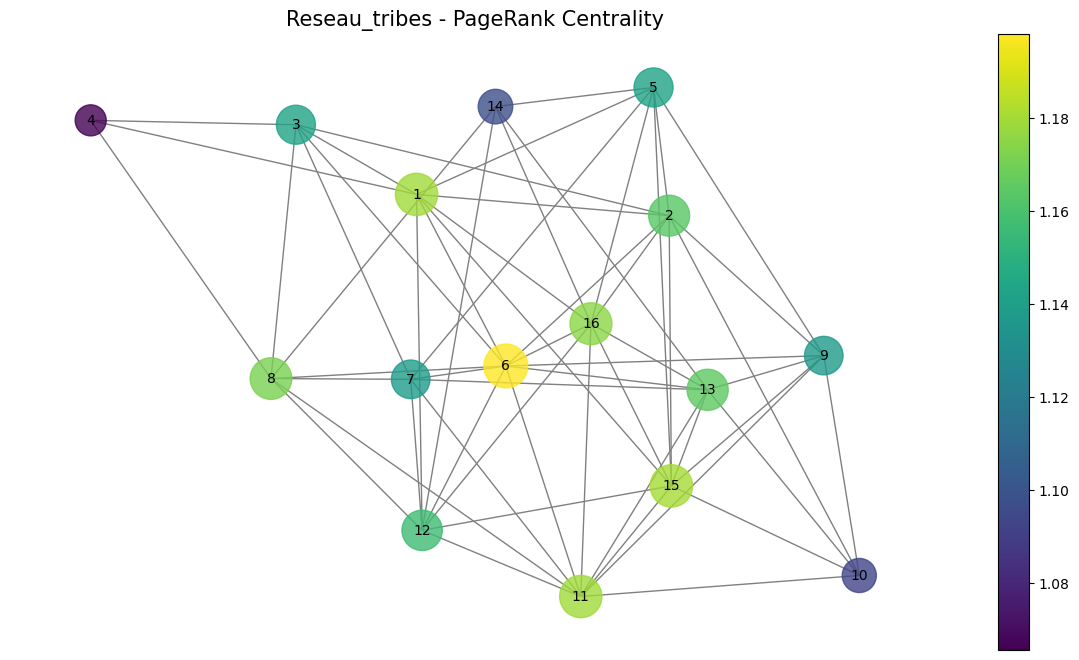

In [ ]:
draw_graph_with_centrality(reseau_tribes, PageRank(reseau_tribes, alpha_optimal(reseau_tribes),1), "Reseau_tribes", "PageRank")

<ipython-input-64-21cc6c809df4>:39: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


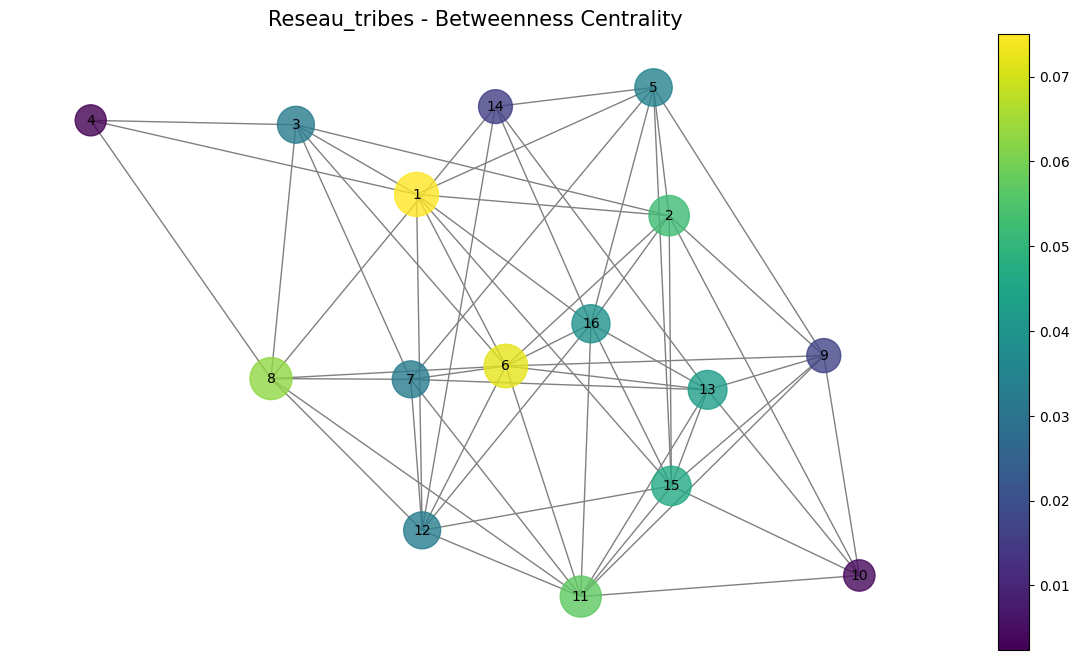

In [ ]:
draw_graph_with_centrality(reseau_tribes, betweenness_centrality(reseau_tribes), "Reseau_tribes", "Betweenness")

<ipython-input-64-21cc6c809df4>:39: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


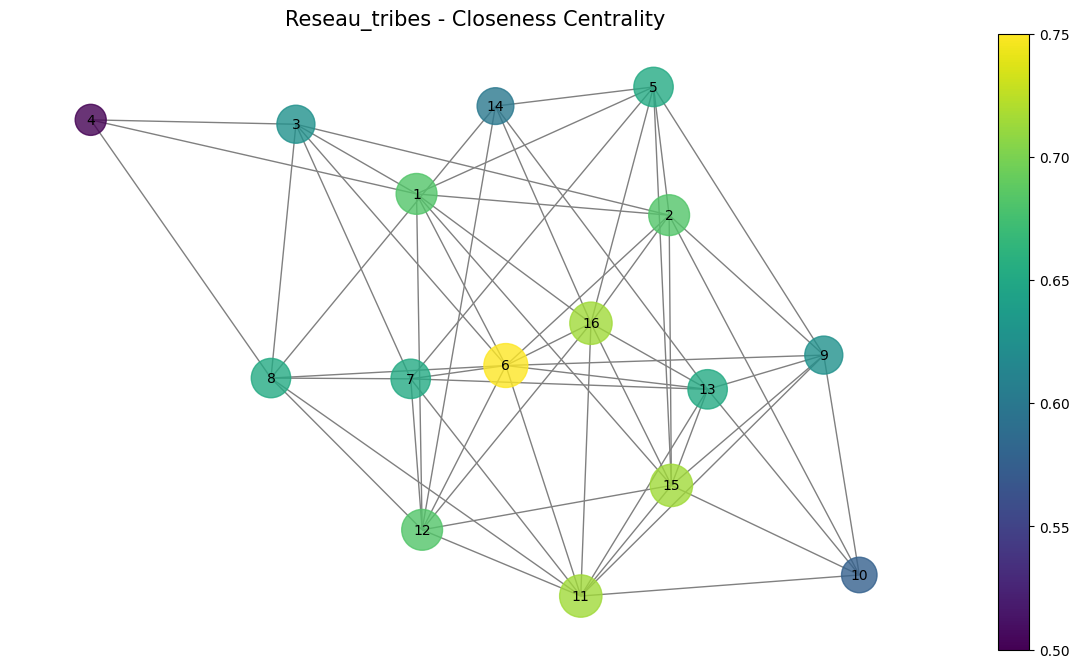

In [ ]:
draw_graph_with_centrality(reseau_tribes, closeness_centrality(reseau_tribes), "Reseau_tribes", "Closeness")

# **Soc physicians**

<ipython-input-64-21cc6c809df4>:39: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


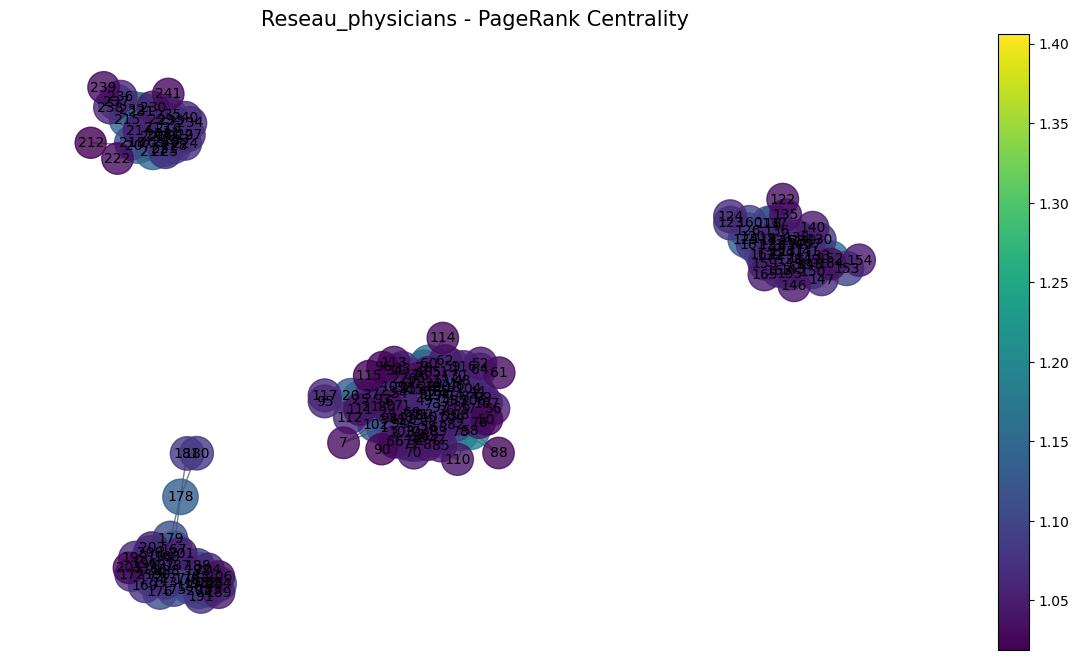

In [ ]:
draw_graph_with_centrality(reseau_physicians, PageRank(reseau_physicians, alpha_optimal(reseau_physicians),1), "Reseau_physicians", "PageRank")

<ipython-input-64-21cc6c809df4>:39: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


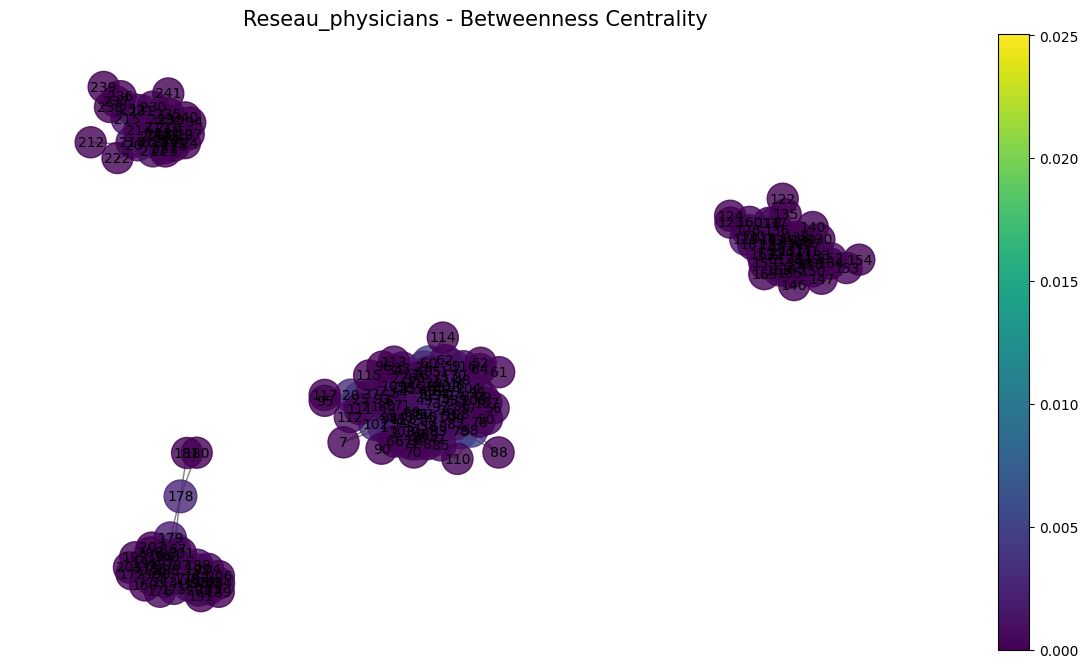

In [ ]:
draw_graph_with_centrality(reseau_physicians, nx.betweenness_centrality(reseau_physicians), "Reseau_physicians", "Betweenness")

<ipython-input-64-21cc6c809df4>:39: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


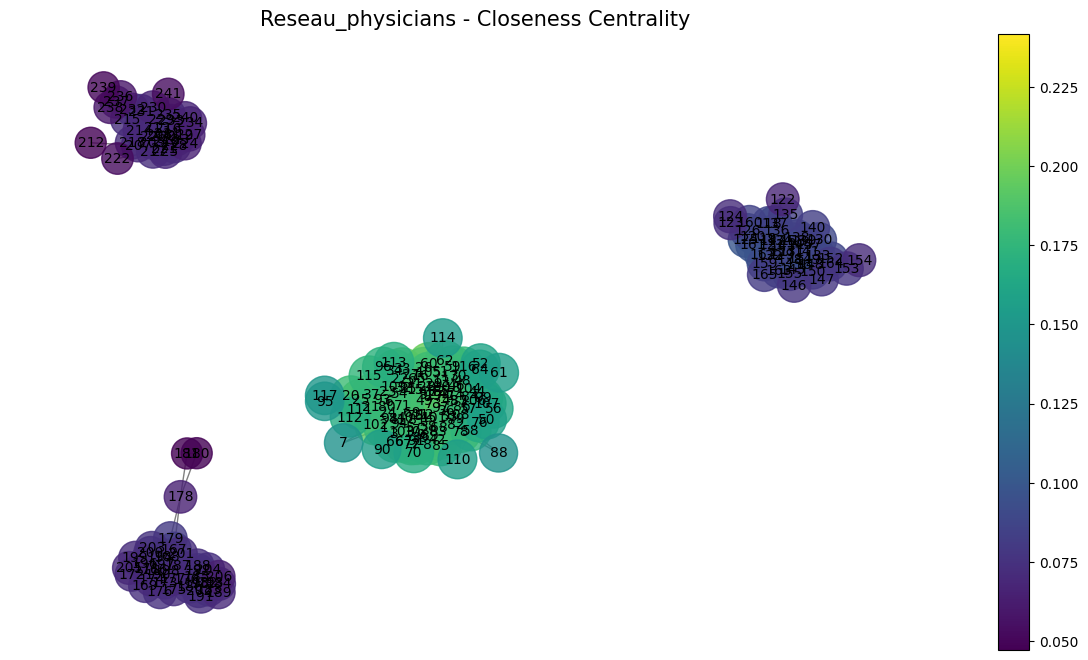

In [ ]:
draw_graph_with_centrality(reseau_physicians, closeness_centrality(reseau_physicians), "Reseau_physicians", "Closeness")

# **Fin du travail**